<a href="https://colab.research.google.com/github/cbandrowski/CSC467_Module3/blob/main/mod3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 3

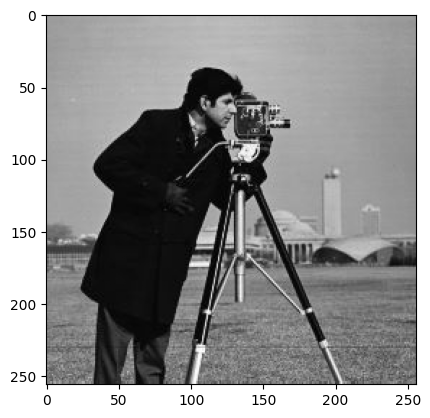

In [12]:
#import cv2
# Opencv Library for Image processing
import cv2
#from skimage import io as io_url
#For simplified image I/O operations
from skimage import io as io_url
import numpy as np
from matplotlib import pyplot as plt

img = io_url.imread('https://raw.githubusercontent.com/cbandrowski/CSC467_Module3/ec4b99c0652cc4ca57b5f136893ca6387d668ebe/cameraman.jpg')
frame = np.float32(img) / 255

plt.imshow(frame)
plt.show()

Harris Corner Detector

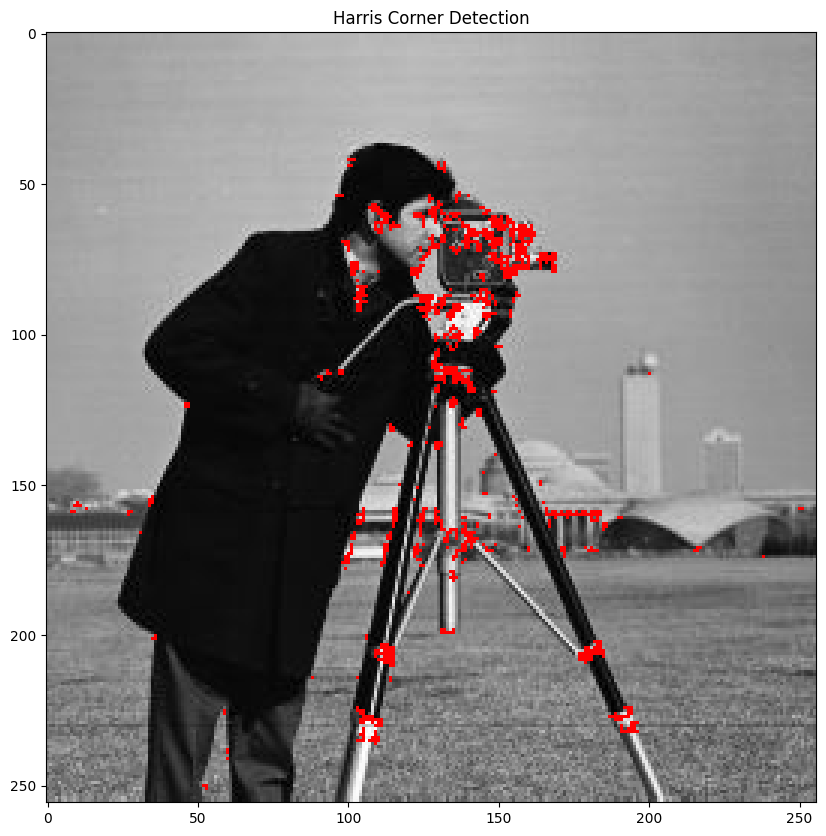

In [13]:
#1. Convert the input image (cameraman.jpg) to grayscale.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#2. Compute image gradients using cv2.Sobel.
x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

#3. Compute the Harris response using cv2.cornerHarris.
harris_response = cv2.cornerHarris(gray, 2, 3, 0.04)
#4. Apply non-maximum suppression and thresholding.
threshold = 0.01 * harris_response.max()
img[harris_response > threshold] = [255,0,0]
#5. Display the image with detected corners.
plt.figure(figsize=(10,10))
plt.title("Harris Corner Detection")
plt.imshow(img)
plt.show()

Scale Invariance

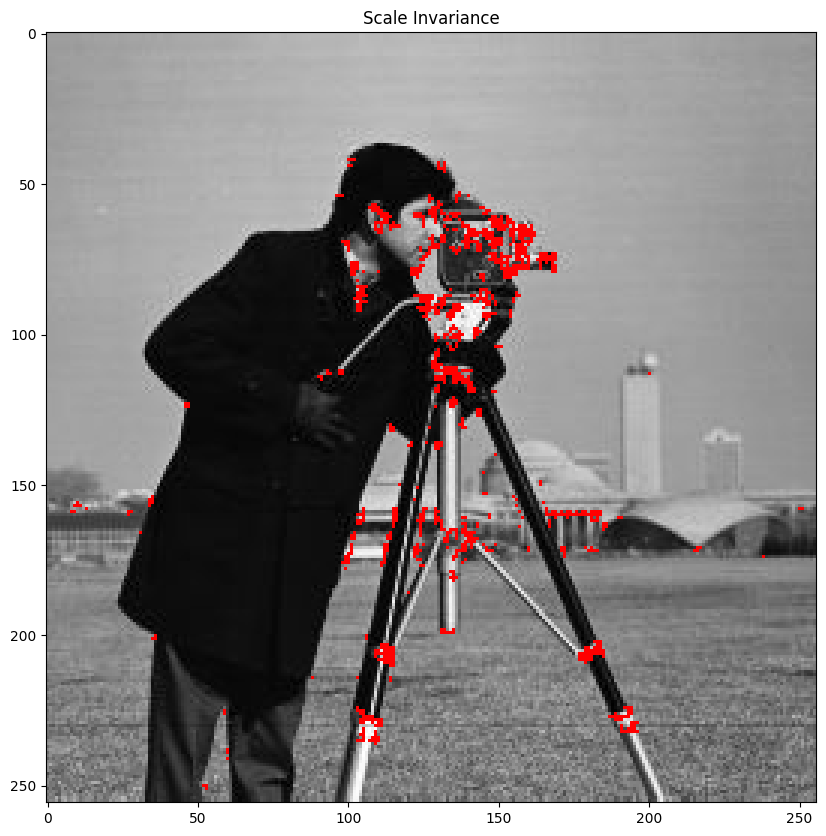

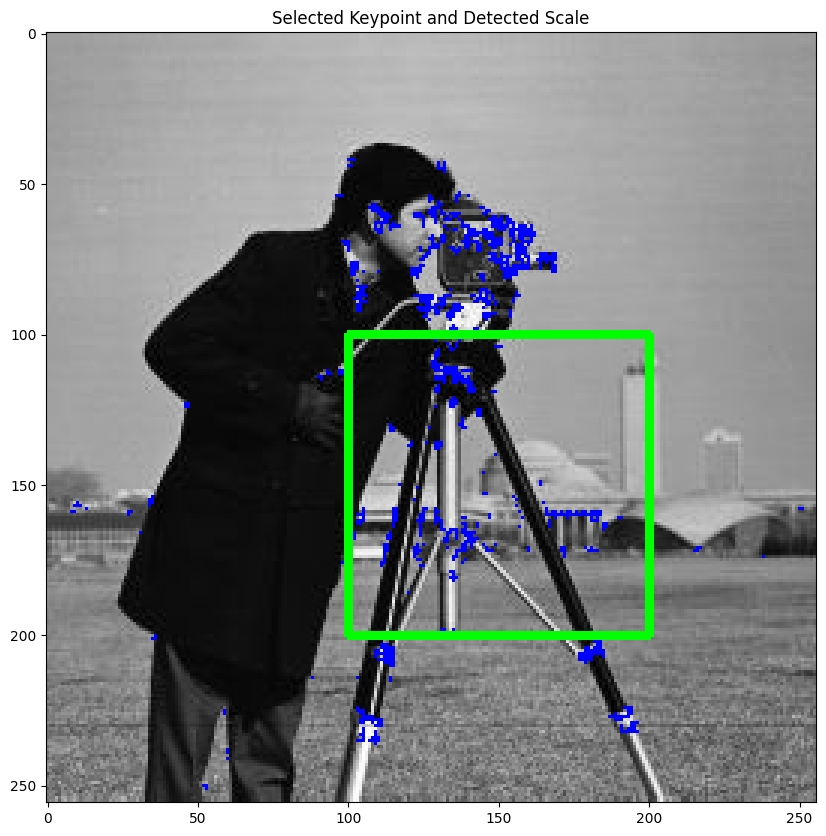

In [15]:
#1. Load cameraman.jpg and select a feature-rich region.
# using Grayscale from before
roi = gray[100:200, 100:200]
#2. Compute the Laplacian and normalized Laplacian at multiple scales.
gaussian_pyr = [roi]
for i in range(3):
    roi = cv2.pyrDown(roi)
    gaussian_pyr.append(roi)
#3. Plot the scale-normalized response over different scales.
laplacian_pyr = []
for i in range(3):
    laplacian = cv2.Laplacian(gaussian_pyr[i], cv2.CV_64F)
    normalized_laplacian = cv2.normalize(laplacian, None, 0, 1, cv2.NORM_MINMAX)
    laplacian_pyr.append(normalized_laplacian)
plt.figure(figsize=(10,10))
plt.title("Scale Invariance")
plt.imshow(img)
plt.show()

#4. Display the image with the selected keypoint and the corresponding detected scale
img_box = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.rectangle(img_box, (100, 100), (200, 200), (0, 255, 0), 2)

plt.figure(figsize=(10,10))
plt.imshow(img_box, cmap='gray')
plt.title("Selected Keypoint and Detected Scale")
plt.show()


Image Alignment using RANSAC

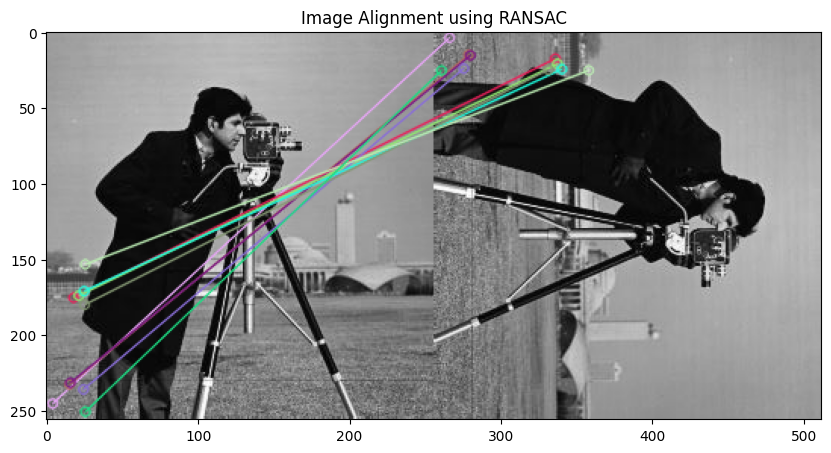

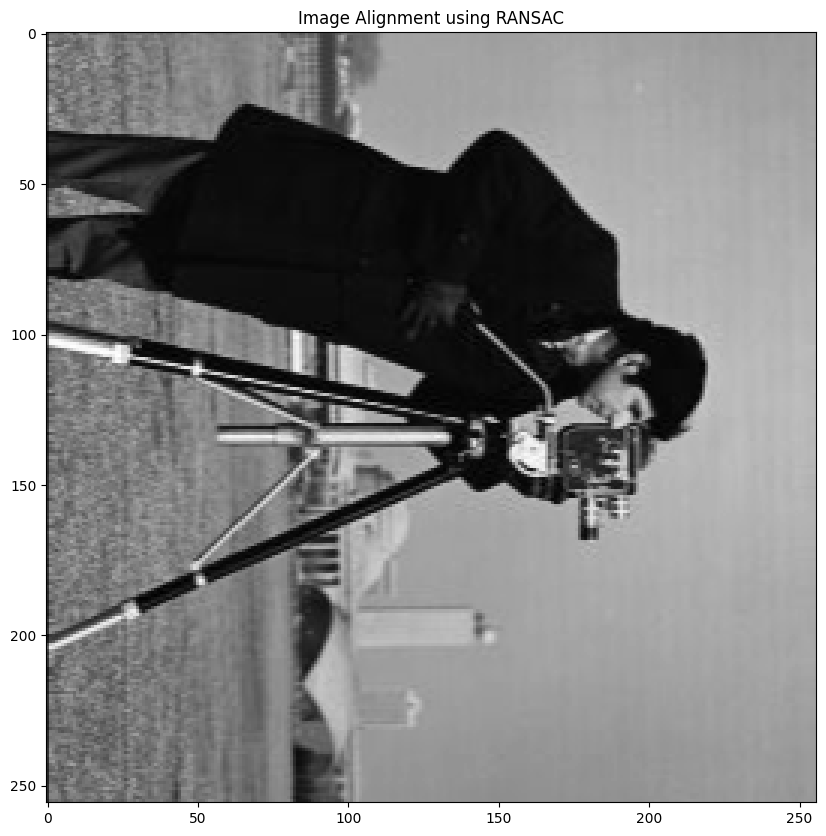

In [17]:
#1. Extract keypoints and descriptors using OpenCV's SIFT or ORB.
img1 = gray
img2 = cv2.rotate(gray, cv2.ROTATE_90_CLOCKWISE)

#2. Match features between two images using cv2.BFMatcher.
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

#3. Estimate the transformation matrix using cv2.findHomography with RANSAC.
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

matched_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)
plt.figure(figsize=(10,10))
plt.title("Image Alignment using RANSAC")
plt.imshow(matched_img, cmap="gray")
plt.show()
#4. Warp one image to align with the other using cv2.warpPerspective.

src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

#5. Display and save the transformed image.
h, w = img1.shape
aligned_img = cv2.warpPerspective(img1, M, (w, h))
plt.figure(figsize=(10,10))
plt.title("Image Alignment using RANSAC")
plt.imshow(aligned_img, cmap="gray")
plt.show()

#save
output_path = "aligned_image.jpg"
cv2.imwrite(output_path, aligned_img)
plt.show()
